In [1]:
from brian2 import *
prefs.codegen.target = "numpy"

In [2]:
 num_neurons = 1

In [3]:
duration = 0.5*second

In [4]:
num_inputs = 10
input_rate = 10*Hz

In [5]:
# Создание пуассоновского шума
P = PoissonGroup(num_inputs, rates=input_rate)

In [6]:
 # Параметры модели
area = 20000*umetre**2
Cm = 1*ufarad*cm**-2 * area
gl = 5e-5*siemens*cm**-2 * area
El = -65*mV
EK = -90*mV
ENa = 50*mV
g_na = 100*msiemens*cm**-2 * area
g_kd = 30*msiemens*cm**-2 * area
VT = -63*mV


In [7]:
# Уравнения модели
eqs = Equations(''' dv/dt = (gl*(El-v) - g_na*(m*m*m)*h*(v-ENa) - g_kd*(n*n*n*n)*(v-EK) + I)/Cm : volt
 dm/dt = 0.32*(mV**-1)*4*mV/exprel((13.*mV-v+VT)/(4*mV))/ms*(1-m)-0.28*(mV**-1)*5*mV/exprel((v-VT-40.*mV)/(5*mV))/ms*m : 1
 dn/dt = 0.032*(mV**-1)*5*mV/exprel((15.*mV-v+VT)/(5*mV))/ms*(1.-n)-.5*exp((10.*mV-v+VT)/(40.*mV))/ms*n : 1
 dh/dt = 0.128*exp((17.*mV-v+VT)/(18.*mV))/ms*(1.-h)- 4./(1+exp((40.*mV-v+VT)/(5.*mV)))/ms*h : 1
 I : amp
''')

In [8]:
group = NeuronGroup(num_neurons, eqs,
    threshold='v > -40*mV',
    refractory='v > -40*mV',
    reset ='I=0*nA',
    method='exponential_euler')

In [9]:
group.v = El

In [10]:
S = Synapses(P, group, on_pre='I=0.7*nA')
S.connect()

In [11]:
state = StateMonitor(group, variables = ['v','m','n','h','I'], record = [0])

monitor = SpikeMonitor(group)

run(duration)

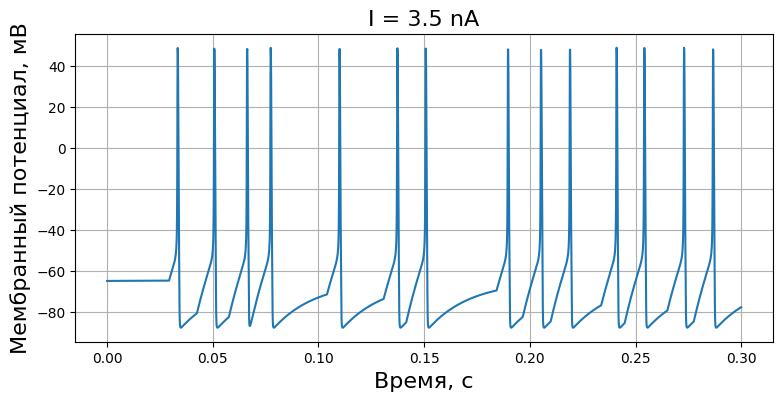

In [14]:
figure(figsize=(9, 4))
plot(state.t[0:3000]/second, state[0].v[0:3000]/mV)
xlabel('Время, с',fontsize=16)
ylabel('Мембранный потенциал, мВ',fontsize=16)
grid()
title('I = '+ str(0.7 * 5 / num_neurons)+' nA',fontsize=16)
name = 'Пуассоновский шум'
savefig(name+'(POISSON)I = '+ str(0.7 * 5 / num_neurons)+'nA'+ 'mp'+str(len(state.t[0:3000]/second)) +'.png')

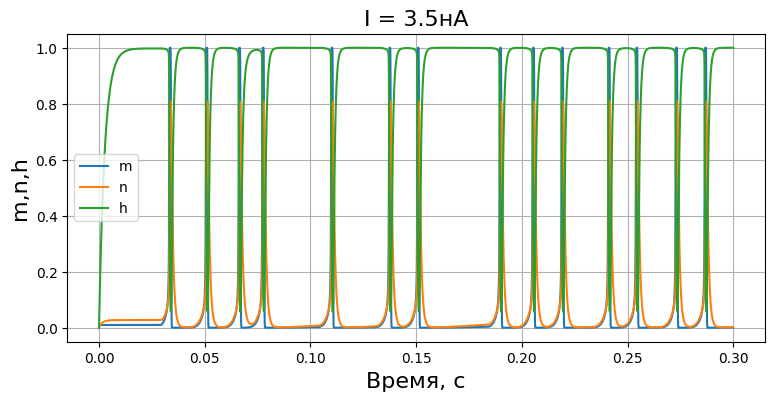

In [15]:
figure(figsize=(9, 4))
plot(state.t[0:3000]/second, state[0].m[0:3000], label = "m")
plot(state.t[0:3000]/second, state[0].n[0:3000], label = "n")
plot(state.t[0:3000]/second, state[0].h[0:3000], label = "h")
xlabel('Время, с',fontsize=16)
ylabel('m,n,h',fontsize=16)
legend()
grid()
title('I = '+ str(0.7 * 5 / num_neurons)+'нA',fontsize=16)
savefig(name+'I='+ str(0.7 * 5 / num_neurons)+'nA'+ 'mnh'+str(len(state.t[0:3000]/second)) +'.png')